# Análisis de Componentes principales -Paso a paso

* Estandarizar o Normalizar los datos (para cada una de las m columnas o variables)
* Obtener los vectores y valores propios a partir de la matriz de covarianza o de correlaciones o incluso la técnica de singular value decomposition.
* Ordenar los valores propios en orden descendente y quedarnos con los 'p' que se corresponde a los 'p' mayores y así disminuir las variables del dataset (p<=m)
* Construir la matriz de proyección W a partir de los p valores propios
* Transformar el dataset original X a través de W para así obtener los datos en el subespacio dimensional de dimensión "p", que será Y.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('python-ml-course-master/datasets/iris/iris.csv')

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [114]:
X = df.iloc[:,0:4].values
Y = df.iloc[:,4].values

In [115]:
X[Y=='setosa',1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [7]:
legend = {0:False,1:False,2:False,3:False}

color = {
    'setosa': 'rgd(255,127,20)',
    'versicolor':'rgb(31,220,120)',
    'virginica': 'rgb(44,50,180)'
}

In [8]:
import matplotlib.pyplot as plt

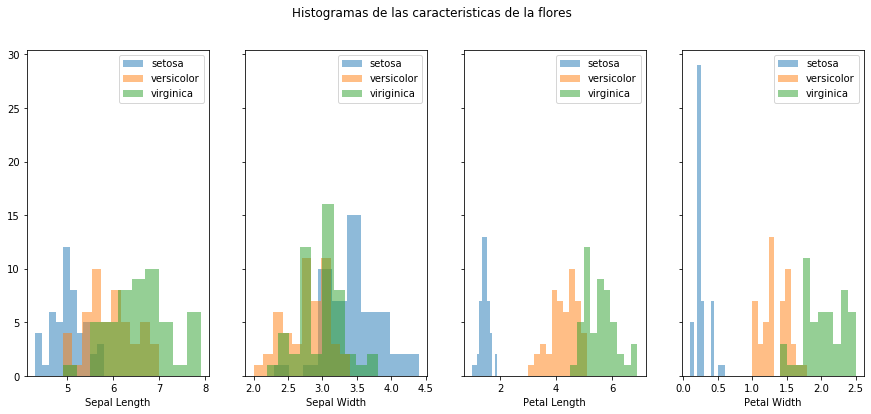

In [33]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(15,6),sharey=True)
fig.suptitle('Histogramas de las caracteristicas de la flores')
ax1.hist(X[Y=='setosa',0],alpha = 0.5,label = 'setosa')
ax1.hist(X[Y=='versicolor',0],alpha = 0.5,label = 'versicolor')
ax1.hist(X[Y=='virginica',0],alpha = 0.5,label = 'virginica')
ax1.set_xlabel('Sepal Length')
ax1.legend()

ax2.hist(X[Y=='setosa',1],alpha = 0.5,label = 'setosa')
ax2.hist(X[Y=='versicolor',1],alpha = 0.5,label = 'versicolor')
ax2.hist(X[Y=='virginica',1],alpha = 0.5,label = 'viriginica')
ax2.set_xlabel('Sepal Width')
ax2.legend()

ax3.hist(X[Y=='setosa',2],alpha = 0.5,label = 'setosa')
ax3.hist(X[Y=='versicolor',2],alpha = 0.5,label = 'versicolor')
ax3.hist(X[Y=='virginica',2],alpha = 0.5, label = 'virginica')
ax3.set_xlabel('Petal Length')
ax3.legend()

ax4.hist(X[Y=='setosa',3],alpha = 0.5,label = 'setosa')
ax4.hist(X[Y=='versicolor',3],alpha = 0.5,label = 'versicolor')
ax4.hist(X[Y=='virginica',3],alpha = 0.5,label = 'virginica')
ax4.set_xlabel('Petal Width')
ax4.legend()

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
X_std = StandardScaler().fit_transform(X) #Datos Normalizados o estandarizados

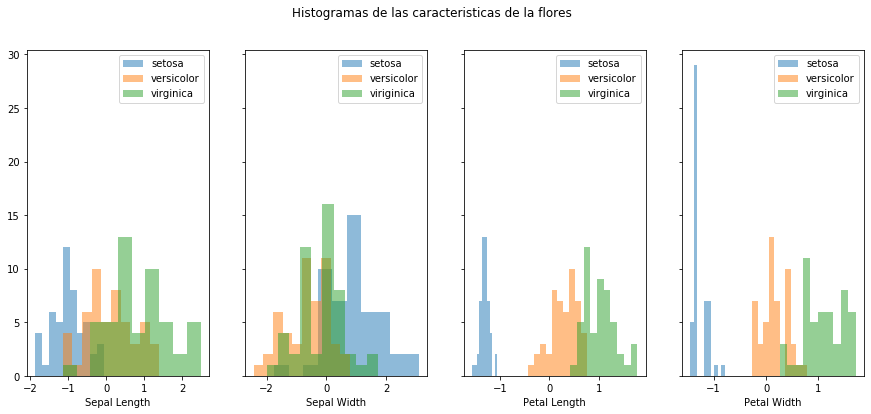

In [30]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(15,6),sharey = True) #Grafica con los datos estandarizados
fig.suptitle('Histogramas de las caracteristicas de la flores')
ax1.hist(X_std[Y=='setosa',0],alpha = 0.5,label = 'setosa')
ax1.hist(X_std[Y=='versicolor',0],alpha = 0.5,label = 'versicolor')
ax1.hist(X_std[Y=='virginica',0],alpha = 0.5,label = 'virginica')
ax1.set_xlabel('Sepal Length')
ax1.legend()

ax2.hist(X_std[Y=='setosa',1],alpha = 0.5,label = 'setosa')
ax2.hist(X_std[Y=='versicolor',1],alpha = 0.5,label = 'versicolor')
ax2.hist(X_std[Y=='virginica',1],alpha = 0.5,label = 'viriginica')
ax2.set_xlabel('Sepal Width')
ax2.legend()

ax3.hist(X_std[Y=='setosa',2],alpha = 0.5,label = 'setosa')
ax3.hist(X_std[Y=='versicolor',2],alpha = 0.5,label = 'versicolor')
ax3.hist(X_std[Y=='virginica',2],alpha = 0.5, label = 'virginica')
ax3.set_xlabel('Petal Length')
ax3.legend()

ax4.hist(X_std[Y=='setosa',3],alpha = 0.5,label = 'setosa')
ax4.hist(X_std[Y=='versicolor',3],alpha = 0.5,label = 'versicolor')
ax4.hist(X_std[Y=='virginica',3],alpha = 0.5,label = 'virginica')
ax4.set_xlabel('Petal Width')
ax4.legend()

## 1- Calculamos la descomposición de valores y vectore propios
* a) Usando la matriz de Covarianzas

In [34]:
from IPython.display import display, Math, Latex

In [37]:
display(Math(r'\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^m (x_{ij}-\overline{x_j})(x_{ik}-\overline{x_k})'))
# La entrada jk de la matriz de covarianzas

<IPython.core.display.Math object>

In [38]:
display(Math(r'\Sigma = \frac{1}{n-1}(X-\overline{x})^T(X-\overline{x})')) #Notación matricial

<IPython.core.display.Math object>

In [39]:
display(Math(r'\overline{x} = \sum_{i=1}^n x_i \in \mathbb R^m')) #Notación de la media

<IPython.core.display.Math object>

In [40]:
import numpy as np

In [42]:
mean_vect = np.mean(X_std,axis=0)
mean_vect

array([-4.73695157e-16, -7.81597009e-16, -4.26325641e-16, -4.73695157e-16])

In [44]:
cov_matrix =(X_std-mean_vect).T.dot((X_std-mean_vect))/(X_std.shape[0]-1)
print('La matriz de covarianzas es \n%s'%cov_matrix)

La matriz de covarianzas es 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [45]:
# Matriz de covarianza con numpy
np.cov(X_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [46]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('Valores propios \n%s' %eig_vals)
print('vectores propios \n%s' %eig_vectors)

Valores propios 
[2.93808505 0.9201649  0.14774182 0.02085386]
vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


* b) Usando la matriz de correlación : Usado en el campo de las finanzas

In [47]:
corr_matrix = np.corrcoef(X_std.T)
corr_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [48]:
eig_vals_corr,eig_vectors_corr = np.linalg.eig(corr_matrix)
print('Valores propios \n%s' %eig_vals_corr)
print('vectores propios \n%s' %eig_vectors_corr)

Valores propios 
[2.91849782 0.91403047 0.14675688 0.02071484]
vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [49]:
corr_matrix = np.corrcoef(X.T)
corr_matrix #Es igual si los datos estan normalizados o no

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

* c) Usando la descomposición del valor singular o Singular Value Decomposition

In [50]:
u,s,v = np.linalg.svd(X_std.T)
u # Los vectores propios

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

### 2- Seleccionar las componentes principales

In [52]:
for ev in eig_vectors:
    print('La longitud del vector propio es: ' + str(np.linalg.norm(ev)))
#Mostrar que se tiene un base con vectores propios normales

La longitud del vector propio es: 0.9999999999999997
La longitud del vector propio es: 1.0000000000000002
La longitud del vector propio es: 1.0
La longitud del vector propio es: 0.9999999999999997


In [53]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vectors[:,i]) for i in range(len(eig_vals))]
eigen_pairs

[(2.938085050199993,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624873,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449481,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462803,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [54]:
# Para ordenar los vectores propios con valor propio de mayor a menor
eigen_pairs.sort()# Ordenar de menor a mayor según la primera columna
eigen_pairs.reverse()
eigen_pairs

[(2.938085050199993,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624873,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449481,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462803,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [55]:
print('Valores propios en orden descendente')
for ep in eigen_pairs:
    print(ep[0])

Valores propios en orden descendente
2.938085050199993
0.9201649041624873
0.1477418210449481
0.020853862176462803


Se utiliza la varianza acumulativa para mirar que porcentaje de la varianza es explicada por cuantos valores propios

In [79]:
total_sum = sum(eig_vals)
var_exp = [(eigen_pairs[i][0]/total_sum)*100 for i in range(len(eigen_pairs))]
cum_var_exp = np.cumsum(var_exp)

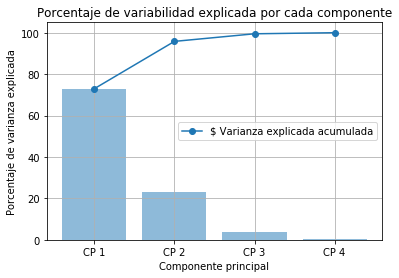

In [104]:
plt.bar(['CP %s' %i for i in range(1,5)],height= var_exp,alpha = 0.5)
plt.plot(['CP %s' %i for i in range(1,5)], cum_var_exp,linestyle = '-',marker = 'o',label = '$ Varianza explicada acumulada')
plt.title('Porcentaje de variabilidad explicada por cada componente')
plt.xlabel('Componente principal')
plt.ylabel('Porcentaje de varianza explicada')
plt.grid()
plt.legend()

In [106]:
W = np.hstack((eigen_pairs[0][1].reshape(4,1),
             eigen_pairs[1][1].reshape(4,1)))
W

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [107]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

## 3 -Proyectando las variables en el nuevo subespacio vectorial

In [108]:
display(Math(r'Y = X \cdot W, X \in M(\mathbb R)_{150,4}, W \in M(\mathbb R)_{4,2}, Y \in M(\mathbb R)_{150,2}'))

<IPython.core.display.Math object>

In [113]:
Y_std = X_std.dot(W)

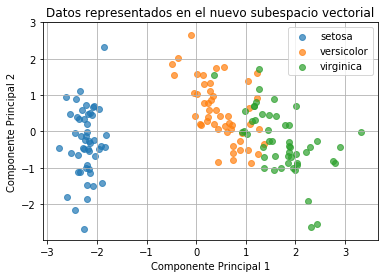

In [133]:
fig, ax = plt.subplots()
for name in ('setosa','versicolor','virginica'):
    ax.scatter(Y_std[Y==name,0],Y_std[Y==name,1],label = name,alpha = 0.7)
ax.legend()
ax.set_title('Datos representados en el nuevo subespacio vectorial')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')

ax.grid(True)